# PREDICTING RESIDENTIAL REAL ESTATE PRICES IN AMES IOWA

In [2]:
# 1. OBJECTIVE AND BACKGROUND
# 2. DATA
#     2.1. Description
#     2.2. Predictors
#     2.3. Data Overview

# 3. PREPROCESSING AND EXPLORATORY ANALYSIS
#     3.1. Data Preprocessing and Imputation of Missing Values
#     3.2. Descriptive Statistics
#     		3.2.1 Scatterplots
#     		3.2.2 Boxplots
#     		3.2.3 Heatmaps

## 1. OBJECTIVE AND BACKGROUND

This project was developed as part of a Machine Learning Kaggle Project for the New York City Data Science Academy Bootcamp. The main objective is to build both a highly predictive and descriptive model.

The specific objectives are:
1) performing feature engineering and descriptive data analysis to gain business insights into the factors correlated with real estate sale prices.
2) building predictive ML models for sale prices and achieving the best possible predictions.
3) maintaining the interpretability of these results and deploying SHAP.

## 2. DATA

### 2.1 Data Description
The version of the Ames Housing dataset used in this analysis contains 2,580 house sale records from 2006 to 2010. The dataset was compiled by Professor Dean De Cock, a statistics professor at Truman State University.

Variables: The dataset includes 81 columns.
Two of these are the row ID and the sale price (the target variable). The remaining columns capture various aspects of each property, such as lot size, neighborhood, building type, exterior materials, roof style, interior quality, and more.

### 2.2 Predictors

The predictors are grouped into 11 categories based on the type of information they describe:
Identification and Target; Location, Zoning, and Proximity; Structural and Building Class; Exterior Materials and Finishes; Foundation and Below Grade; Living Area and Floor Plan; Heating, Cooling, and Electrical; Fireplaces; Garage and Parking; Outdoor Features and Amenities; and Transaction Details.

There are 43 categorical features
There are 36 numeric features.

A detailed list of these variables is provided below.

#### Predictors are divided into 11 groups:

1. Identification & Target
- PID: parcel identification number
- SalePrice: sale price in dollars

2. Location, Zoning & Proximity
- Neighborhood: area within city
- MSZoning: zoning classification
- LotArea: lot size in square feet
- LotFrontage: street frontage length
- Street: road access type
- Alley: alley access type
- LotShape: shape of the lot
- LandContour: lot flatness
- LandSlope: lot slope severity
- LotConfig: lot layout configuration
- Utilities: utilities available
- Condition1: primary proximity condition
- Condition2: secondary proximity condition

3. Structural & Building Class
- MSSubClass: dwelling class type
- BldgType: building type
- HouseStyle: style of the house
- YearBuilt: original build year
- YearRemodAdd: remodel/addition year
- OverallQual: overall quality rating
- OverallCond: overall condition rating

4. Exterior Materials & Finishes
- RoofStyle: roof type
- RoofMatl: roof material
- Exterior1st: primary exterior covering
- Exterior2nd: secondary exterior covering
- MasVnrType: masonry veneer type
- MasVnrArea: masonry veneer area (square feet)
- ExterQual: exterior material quality
- ExterCond: exterior condition rating

5. Foundation & Below-Grade
- Foundation: foundation type
- BsmtQual: basement height quality
- BsmtCond: basement condition rating
- BsmtExposure: basement wall exposure
- BsmtFinType1: 1st finished area quality
- BsmtFinSF1: 1st finished area square feet
- BsmtFinType2: 2nd finished area quality
- BsmtFinSF2: 2nd finished area square feet
- BsmtUnfSF: unfinished basement square feet
- TotalBsmtSF: total basement square feet
- BsmtFullBath: basement full baths count
- BsmtHalfBath: basement half baths count

6. Living Area & Floor Plan
- 1stFlrSF: first-floor area square feet
- 2ndFlrSF: second-floor area square feet
- LowQualFinSF: low-quality finished area square feet
- GrLivArea: above-ground living area square feet
- TotRmsAbvGrd: rooms above grade count
- BedroomAbvGr: bedrooms above grade count
- KitchenAbvGr: kitchens above grade count
- KitchenQual: kitchen quality rating
- Functional: home functionality rating
- FullBath: full baths above grade count
- HalfBath: half baths above grade count

7. Heating, Cooling & Electrical
- Heating: heating type
- HeatingQC: heating quality rating
- CentralAir: central air conditioning (Y/N)
- Electrical: electrical system type
- Fireplaces: number of fireplaces
- FireplaceQu: fireplace quality rating

8. Garage & Parking
- GarageType: garage location type
- GarageYrBlt: garage build year
- GarageFinish: garage interior finish
- GarageCars: garage car capacity
- GarageArea: garage area square feet
- GarageQual: garage quality rating
- GarageCond: garage condition rating
- PavedDrive: paved driveway type

10. Outdoor Features & Amenities
- WoodDeckSF: wood deck area square feet
- OpenPorchSF: open porch area square feet
- EnclosedPorch: enclosed porch area square feet
- 3SsnPorch: three-season porch area square feet
- ScreenPorch: screened porch area square feet
- PoolArea: pool area square feet
- PoolQC: pool quality rating
- Fence: fence quality rating
- MiscFeature: miscellaneous feature type
- MiscVal: miscellaneous feature value

11. Transaction Details
- MoSold: month sold
- YrSold: year sold
- SaleType: sale transaction type
- SaleCondition: sale condition type

###     2.3 Data Overview

In [ ]:
#pip install numpy pandas matplotlib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


#pd.set_option('display.max_rows', None)  # This line ensures all rows are displayed
#pd.set_option('display.max_columns', None)  # Display all colum

## 3. PREPROCESSING AND EXPLORATORY ANALYSIS
This section outlines the data used in the analysis. We begin by exploring the dataset using functions such as describe() and head() to gain an initial understanding of the data. Next, we examine the extent and patterns of missing values. 

In [5]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [6]:
housing.dtypes.value_counts()

object     43
int64      27
float64    11
Name: count, dtype: int64

In [7]:
housing.dtypes

PID               int64
GrLivArea         int64
SalePrice         int64
MSSubClass        int64
MSZoning         object
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 81, dtype: object

In [8]:
housing.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,...,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,...,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,...,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,...,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [9]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


## 3. PREPROCESSING AND EXPLORATORY ANALYSIS

###     3.1. Data Preprocessing and Imputation of Missing Values

In [ ]:
import pandas as pd

# Set global display option for max rows (optional)
pd.set_option('display.max_rows', None)

# Count the missing values in each column
missing_values = housing.isna().sum()

# Print each column's missing value count individually
for col, count in missing_values.items():
    print(f"{col}: {count}")

PID: 0
GrLivArea: 0
SalePrice: 0
MSSubClass: 0
MSZoning: 0
LotFrontage: 462
LotArea: 0
Street: 0
Alley: 2412
LotShape: 0
LandContour: 0
Utilities: 0
LotConfig: 0
LandSlope: 0
Neighborhood: 0
Condition1: 0
Condition2: 0
BldgType: 0
HouseStyle: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
RoofStyle: 0
RoofMatl: 0
Exterior1st: 0
Exterior2nd: 0
MasVnrType: 1573
MasVnrArea: 14
ExterQual: 0
ExterCond: 0
Foundation: 0
BsmtQual: 69
BsmtCond: 69
BsmtExposure: 71
BsmtFinType1: 69
BsmtFinSF1: 1
BsmtFinType2: 70
BsmtFinSF2: 1
BsmtUnfSF: 1
TotalBsmtSF: 1
Heating: 0
HeatingQC: 0
CentralAir: 0
Electrical: 1
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
BsmtFullBath: 2
BsmtHalfBath: 2
FullBath: 0
HalfBath: 0
BedroomAbvGr: 0
KitchenAbvGr: 0
KitchenQual: 0
TotRmsAbvGrd: 0
Functional: 0
Fireplaces: 0
FireplaceQu: 1241
GarageType: 127
GarageYrBlt: 129
GarageFinish: 129
GarageCars: 1
GarageArea: 1
GarageQual: 129
GarageCond: 129
PavedDrive: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorc

In [ ]:
missing_values = []

for col in housing.columns:
 percent = housing[col].isna().sum()/len(housing) #creating a float 
 missing_values.append((col, percent))
print(missing_values)
missing_values.sort(key=lambda x: x[1])

#print missing values as a percentage of total obs
for col, percent in missing_values:
 print(f"{col}: {percent}")

[('PID', np.float64(0.0)), ('GrLivArea', np.float64(0.0)), ('SalePrice', np.float64(0.0)), ('MSSubClass', np.float64(0.0)), ('MSZoning', np.float64(0.0)), ('LotFrontage', np.float64(0.17906976744186046)), ('LotArea', np.float64(0.0)), ('Street', np.float64(0.0)), ('Alley', np.float64(0.9348837209302325)), ('LotShape', np.float64(0.0)), ('LandContour', np.float64(0.0)), ('Utilities', np.float64(0.0)), ('LotConfig', np.float64(0.0)), ('LandSlope', np.float64(0.0)), ('Neighborhood', np.float64(0.0)), ('Condition1', np.float64(0.0)), ('Condition2', np.float64(0.0)), ('BldgType', np.float64(0.0)), ('HouseStyle', np.float64(0.0)), ('OverallQual', np.float64(0.0)), ('OverallCond', np.float64(0.0)), ('YearBuilt', np.float64(0.0)), ('YearRemodAdd', np.float64(0.0)), ('RoofStyle', np.float64(0.0)), ('RoofMatl', np.float64(0.0)), ('Exterior1st', np.float64(0.0)), ('Exterior2nd', np.float64(0.0)), ('MasVnrType', np.float64(0.6096899224806202)), ('MasVnrArea', np.float64(0.005426356589147287)), ('E

In [ ]:
'''
*****REPLACE MISSING VALUE FOR THE ACTUAL VALUE WE KNOW IS MISSING*****
*BsmtQual: 0.026744186046511628 NA	No Basement
*BsmtCond: 0.026744186046511628 NA	No Basement  
*BsmtFinType1: 0.026744186046511628 NA	No Basement
*BsmtFinType2: 0.027131782945736434 NA No Basement
*BsmtExposure: 0.02751937984496124 NA No Basement
*BsmtFinSF1 Replace 0
*BsmtFinSF2 Replace 0
*BsmtUnfSF Replace 0
*TotalBsmtSF Replace 0
*BsmtFullBath Replace 0
*BsmtHalfBath Replace 0
*GarageType: 0.04922480620155039 NA No Garage
*GarageQual: 0.05 NA No Garage
*GarageCond: 0.05 NA No Garage
*GarageFinish: 0.05 NA No Garage
*GarageYrBlt Replace 0
*GarageCars Replace 0
*GarageArea Replace 0
*FireplaceQu: 0.4810077519379845 NA No fireplace
*Fence: 0.7965116279069767 NA No Fence
*Alley: 0.9348837209302325 NA No alley acces
*MiscFeature: 0.9624031007751938 NA None
*PoolQC: 0.9965116279069768 NA No Pool
'''

'\n*****REPLACE MISSING VALUE FOR THE ACTUAL VALUE WE KNOW IS MISSING*****\n*BsmtQual: 0.026744186046511628 NA\tNo Basement\n*BsmtCond: 0.026744186046511628 NA\tNo Basement  \n*BsmtFinType1: 0.026744186046511628 NA\tNo Basement\n*BsmtFinType2: 0.027131782945736434 NA No Basement\n*BsmtExposure: 0.02751937984496124 NA No Basement\n*BsmtFinSF1 Replace 0\n*BsmtFinSF2 Replace 0\n*BsmtUnfSF Replace 0\n*TotalBsmtSF Replace 0\n*BsmtFullBath Replace 0\n*BsmtHalfBath Replace 0\n*GarageType: 0.04922480620155039 NA No Garage\n*GarageQual: 0.05 NA No Garage\n*GarageCond: 0.05 NA No Garage\n*GarageFinish: 0.05 NA No Garage\n*GarageYrBlt Replace 0\n*GarageCars Replace 0\n*GarageArea Replace 0\n*FireplaceQu: 0.4810077519379845 NA No fireplace\n*Fence: 0.7965116279069767 NA No Fence\n*Alley: 0.9348837209302325 NA No alley acces\n*MiscFeature: 0.9624031007751938 NA None\n*PoolQC: 0.9965116279069768 NA No Pool\n'

In [ ]:
# Drop PID because it's the ID number for each obs, doesn't help the prediction
df = housing.drop(columns=['PID'])

In [ ]:
# I'll impute the values for basement variables that I know for sure what's the missing value. 
df.replace({
    'BsmtFinType1': {np.nan: "No Basement"},
    'BsmtQual': {np.nan: "No Basement"},
    'BsmtCond': {np.nan: "No Basement"},
}, inplace=True)

# I am imputing 0 in sq feet for Bsmt Finished area since there is no basement when BsmtFinType1 equals No basement
df['BsmtFinType2']=df['BsmtFinType2'].astype(object)
df.loc[
    df['BsmtFinType1']=="No Basement",
    'BsmtFinType2'] = "No Basement"

# I am imputing no basement in BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, when BsmtFinType1 is "No Basement" because there is no basement

basement_vars =['BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
for col in basement_vars:
    df.loc[df['BsmtFinType2']=="No Basement", [col]] = 0

In [ ]:
# replacing basement type1 with no basement when there is no basement
df['BsmtFinType1'] = df['BsmtFinType1'].replace({np.nan : "No Basement"})

In [ ]:
# replacing basement exposure with no basement when there is no basement
df.loc[df['BsmtFinType1']=="No Basement", 'BsmtExposure'] = "No Basement"
#print(housing['BsmtExposure'].value_counts(dropna=False))
# print(df['BsmtExposure'].value_counts(dropna=False))

In [ ]:
# replacing garage yr built, type quality area and cars by the correct number when there is no garage
df.replace({
    "GarageType": {np.nan: "No Garage"},
    "GarageQual": {np.nan: "No Garage"}
}, inplace=True)

df.loc[df['GarageQual']=="No Garage", 'GarageCond']= "No Garage"
df.loc[df['GarageType']=="No Garage", 'GarageFinish']= "No Garage"
df.loc[df['GarageType']=="No Garage", 'GarageYrBlt']= 0

df.replace({
    "GarageYrBlt": {"No Garage": 0},
    "GarageCars": {"No Garage": 0},
    "GarageArea": {"No Garage": 0},
}, inplace=True)

In [ ]:
# Replacing values that I know represent the absence of fireplace, fence alley, miscfeature and pool
df.replace({
    "FireplaceQu": {np.nan: "No Fireplace"},
    "Fence": {np.nan: "No Fence"},
    "Alley": {np.nan: "No Alley"},
    "MiscFeature": {np.nan: "No MiscFeature"},
    "PoolQC": {np.nan: "No Pool"}
}, inplace=True)

In [ ]:
# replacing MasVnrType with None with MasVnrArea=0 and MasVnrType!=0
df.loc[df['MasVnrArea']==0, 'MasVnrType'] = "No MasVnr"

In [ ]:
# Double checking the replacement for no basement worked. 

# NOTICE THERE IS AN ERROR IN THE DATABASE. THERE IS A DISCREPANCY BETWEEN VARIABLES THAT HAVE DATA ON THE NUMBER OF MISSING VALUES

# print(df['BsmtFinType1'].value_counts(dropna=False))
# mask = (df['BsmtFinSF1']=="No Basement") | (df['BsmtFinSF1'].isna())
# print(df.loc[mask, 'BsmtFinSF1'].value_counts(dropna=False))

# print(df['BsmtFinType2'].value_counts(dropna=False))
# mask = (df['BsmtFinSF2']=="No Basement") | (df['BsmtFinSF2'].isna())
# print(df.loc[mask, 'BsmtFinSF2'].value_counts(dropna=False))

# print(df['BsmtFinType2'].value_counts(dropna=False))
# mask = (df['BsmtUnfSF']=="No Basement") | (df['BsmtUnfSF'].isna())
# print(df.loc[mask, 'BsmtUnfSF'].value_counts(dropna=False))

# print(df['BsmtFinType2'].value_counts(dropna=False))
# mask = (df['TotalBsmtSF']=="No Basement") | (df['TotalBsmtSF'].isna())
# print(df.loc[mask, 'TotalBsmtSF'].value_counts(dropna=False))

In [ ]:
# counting the missing values to find out whether we need to fill in any other missing values
# We observe the only problematic variable is now lotfrontage, MasVnrArea, and MasVnrType.

missing_values = []
df_columns = list(df.columns)
for col in df_columns:
   total = (df[col].isna().sum())
   missing_values.append((col, total))
print(missing_values)
missing_values.sort(key = lambda x: x[1])

for col, total in missing_values:
   print(f"{col}: {total}")

[('GrLivArea', np.int64(0)), ('SalePrice', np.int64(0)), ('MSSubClass', np.int64(0)), ('MSZoning', np.int64(0)), ('LotFrontage', np.int64(462)), ('LotArea', np.int64(0)), ('Street', np.int64(0)), ('Alley', np.int64(0)), ('LotShape', np.int64(0)), ('LandContour', np.int64(0)), ('Utilities', np.int64(0)), ('LotConfig', np.int64(0)), ('LandSlope', np.int64(0)), ('Neighborhood', np.int64(0)), ('Condition1', np.int64(0)), ('Condition2', np.int64(0)), ('BldgType', np.int64(0)), ('HouseStyle', np.int64(0)), ('OverallQual', np.int64(0)), ('OverallCond', np.int64(0)), ('YearBuilt', np.int64(0)), ('YearRemodAdd', np.int64(0)), ('RoofStyle', np.int64(0)), ('RoofMatl', np.int64(0)), ('Exterior1st', np.int64(0)), ('Exterior2nd', np.int64(0)), ('MasVnrType', np.int64(21)), ('MasVnrArea', np.int64(14)), ('ExterQual', np.int64(0)), ('ExterCond', np.int64(0)), ('Foundation', np.int64(0)), ('BsmtQual', np.int64(0)), ('BsmtCond', np.int64(0)), ('BsmtExposure', np.int64(2)), ('BsmtFinType1', np.int64(0)),

In [ ]:
df_columns = list(df.columns)
for col in df_columns:
    print("--------------")
    print(f"{col}:", df[col].dtype)
    # Convert column to string type temporarily for sorting if mixed types are present
    print(df[col].astype(str).value_counts(dropna=False).sort_index())

--------------
GrLivArea: int64
GrLivArea
1000     1
1001     1
1002     1
1003     1
1004     3
1005     3
1006     1
1008     7
1009     1
1012     3
1013     1
1014     1
1017     1
1020     4
1022     3
1024     2
1025     2
1026     4
1027     2
1028     1
1029     1
1030     1
1031     1
1032     4
1033     1
1034     5
1036     2
1037     1
1038     1
1039     2
1040    25
1041     2
1042     1
1043     1
1044     2
1045     3
1047     1
1048     3
1049     2
1050     4
1051     2
1052     3
1053     2
1054     1
1055     4
1056     7
1057     2
1059     1
1060     3
1061     1
1062     2
1063     1
1064     2
1065     1
1067     1
1068     2
1069     2
1072     7
1073     4
1074     3
1077     2
1078     3
1079     1
1080     6
1081     1
1082     2
1083     1
1086     3
1088     2
1089     1
1090     2
1091     2
1092    24
1093     2
1094     2
1095     1
1096     3
1097     3
1098     2
1099     1
1100     2
1102     2
1103     2
1104     1
1105     1
1107     2
1108     1
1

In [ ]:
# ordinal mapping 
### assigning orderly values to categorical variables that have an order
### highest number is the best
mapping = {
    'LotShape':        {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}, 
    'Utilities':       {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4},
    'LandSlope':       {'Sev': 0, 'Mod': 1, 'Gtl': 2},
    'ExterQual':       {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'ExterCond':       {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'BsmtQual':        {'No Basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtCond':        {'No Basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtExposure':    {'No Basement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1':    {'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2':    {'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'HeatingQC':       {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, 
    'Electrical':      {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
    'KitchenQual':     {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'Functional':      {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
    'FireplaceQu':     {'No Fireplace': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageFinish':    {'No Garage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 5},
    'GarageQual':      {'No Garage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond':      {'No Garage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},   
    'PavedDrive':      {'N': 0, 'P': 1, 'Y': 2},
    'PoolQC':          {'No Pool': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},  
    'Fence':           {"No Fence": 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
}

In [ ]:
# col gets the key (e.g., 'LotShape')
# mapping gets the value (e.g., {'IR3': 0, 'IR2': 1, ...})
# remember to add parenthesis after items to make sure it gets the values

df.replace(mapping, inplace=True)
for col in mapping.keys():
    df[col]=df[col].astype('Int64')                                               

/var/folders/hy/90dnshld3qb37gxg3l5qd2km0000gn/T/ipykernel_48114/145341524.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapping, inplace=True)


In [ ]:
ordinal_columns = [
    'LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 
    'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
    'PoolQC', 'Fence'
]

for col in ordinal_columns:
    print(df[col].value_counts(dropna=False))
    print(df[col].dtype)

LotShape
3    1641
2     855
1      71
0      13
Name: count, dtype: Int64
Int64
Utilities
4    2578
3       2
Name: count, dtype: Int64
Int64
LandSlope
2    2458
1     109
0      13
Name: count, dtype: Int64
Int64
ExterQual
2    1636
3     841
4      73
1      30
Name: count, dtype: Int64
Int64
ExterCond
2    2232
3     279
1      56
4      11
0       2
Name: count, dtype: Int64
Int64
BsmtQual
3    1166
4    1077
5     188
2      78
0      69
1       2
Name: count, dtype: Int64
Int64
BsmtCond
3    2316
4     101
2      88
0      69
5       3
1       3
Name: count, dtype: Int64
Int64
BsmtExposure
1       1708
3        344
4        242
2        215
0         69
<NA>       2
Name: count, dtype: Int64
Int64
BsmtFinType1
6    753
1    706
5    397
3    265
4    251
2    139
0     69
Name: count, dtype: Int64
Int64
BsmtFinType2
1       2180
3         97
2         84
0         69
4         64
5         53
6         32
<NA>       1
Name: count, dtype: Int64
Int64
HeatingQC
4    1293
2     768

In [ ]:
### Based on De Cook's notes, we are also removing 5 observations that an instructor 
### recommends removing (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly).
### Three of them are true outliers (Partial Sales that likely don’t represent actual market
### values) and two of them are simply unusual sales (very large houses priced relatively
### appropriately). 
### De Cook recommends removing any houses with more than 4000 square feet from
### the data set (which eliminates these 5 unusual observations) before assigning it to
### students.

In [ ]:
# Drop PID because it's the ID number for each obs, doesn't help the prediction
df.drop(df[df['GrLivArea']>4000].index, inplace=True)

In [ ]:
# drop rows with only one or two missing values
columns_with_1or2_missing_values =['BsmtFinSF1','BsmtFinType2', 'Electrical', 
                                   'GarageCars', 'GarageArea', 'BsmtExposure', 'GarageYrBlt',
                                   'GarageFinish']

df.dropna(subset = columns_with_1or2_missing_values, how= 'any', inplace = True);

In [ ]:
numeric_vars = df.select_dtypes('int64', 'float').columns
for col in numeric_vars:
    df[col] = df[col].astype("int64")
    #display(df[col].value_counts(dropna=False))

In [ ]:
df.shape

(2567, 80)

In [ ]:
# I am removing variables with low variability which are not helpfult to the prediction

In [ ]:
df['PoolQC'].value_counts(dropna=False, normalize=True)

PoolQC
0    0.996494
2    0.001169
4    0.000779
3    0.000779
1    0.000779
Name: proportion, dtype: float64

In [ ]:
low_variation_cols = []

variables = ['Street', 'Utilities', 'Condition2', 'RoofMatl','Heating', 'LowQualFinSF', 
             '3SsnPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal']

for col in variables:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False, normalize=True))
    print(f"\nValue counts for missing values {col}:")
    print(df[col].isna().sum())

df = df.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF','3SsnPorch', 'PoolArea', 'PoolQC'])

'''DROPPING THESE VARIABLES BECAUSE THEY HAVE CLOSE TO ZERO VARIABILITY
Street 99.6% is paved
Utilities 99.95 is #4
Condition2 99% is Norm
Roof Matl 98.6% is CompShg
Heating 98.4% is GasA
LowQualFinSF 98.8 is 0
3SsnPorch 98.8% is 0
PoolArea 99.7% is 0
PoolQC 99.7% is 0'''


Value counts for Street:
Street
Pave    0.996104
Grvl    0.003896
Name: proportion, dtype: float64

Value counts for missing values Street:
0

Value counts for Utilities:
Utilities
4    0.999221
3    0.000779
Name: proportion, dtype: float64

Value counts for missing values Utilities:
0

Value counts for Condition2:
Condition2
Norm      0.990651
Feedr     0.004675
Artery    0.001169
PosA      0.001169
PosN      0.000779
RRNn      0.000779
RRAn      0.000390
RRAe      0.000390
Name: proportion, dtype: float64

Value counts for missing values Condition2:
0

Value counts for RoofMatl:
RoofMatl
CompShg    0.986365
Tar&Grv    0.007012
WdShake    0.003116
WdShngl    0.002337
Metal      0.000390
Roll       0.000390
Membran    0.000390
Name: proportion, dtype: float64

Value counts for missing values RoofMatl:
0

Value counts for Heating:
Heating
GasA     0.984418
GasW     0.009739
Grav     0.002727
Wall     0.001948
OthW     0.000779
Floor    0.000390
Name: proportion, dtype: float64

Value 

'DROPPING THESE VARIABLES BECAUSE THEY HAVE CLOSE TO ZERO VARIABILITY\nStreet 99.6% is paved\nUtilities 99.95 is #4\nCondition2 99% is Norm\nRoof Matl 98.6% is CompShg\nHeating 98.4% is GasA\nLowQualFinSF 98.8 is 0\n3SsnPorch 98.8% is 0\nPoolArea 99.7% is 0\nPoolQC 99.7% is 0'

In [ ]:
# assume df is your DataFrame
threshold = 0.98

# find columns where the top category ≥ 98%
dominant_cols = [
    col
    for col in df.columns
    if df[col].value_counts(normalize=True, dropna=False).values.max() >= threshold
]

# for each such column, get the most frequent value and its proportion
result = {
    col: {
        "top_value": df[col].value_counts(normalize=True, dropna=False).idxmax(),
        "proportion": df[col].value_counts(normalize=True, dropna=False).max()
    }
    for col in dominant_cols
}

print("Columns dominated by ≥98% of one value:")
for col, info in result.items():
    print(f" • {col!r}: {info['top_value']!r} ({info['proportion']:.1%})")


Columns dominated by ≥98% of one value:


In [ ]:
list(df.columns)

['GrLivArea',
 'SalePrice',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'Fence',
 'MiscFeature',
 'MiscVal',
 

###  3.2. Descriptive Statistics

In [ ]:
# Creating a dataset df with sale price as the first column + the rest of the columns in housing
df = df[['SalePrice'] + [col for col in df.columns if col != 'SalePrice']]
with pd.option_context('display.max_columns',None):
    display(df.head())

,SalePrice,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,126000,856,30,RL,NaN,7890,No Alley,3,Lvl,Corner,2,SWISU,Norm,1Fam,1Story,6,6,1939,1950,Gable,Wd Sdng,Wd Sdng,No MasVnr,0.0,2,2,CBlock,3,3,1,3,238.0,1,0.0,618.0,856.0,2,Y,5,856,0,1.0,0.0,1,0,2,1,2,4,8,1,4,Detchd,1939.0,1,2.0,399.0,3,3,2,0,0,0,166,0,No MiscFeature,0,3,2010,WD,Normal
2,139500,1049,120,RL,42.0,4235,No Alley,3,Lvl,Inside,2,Edwards,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,HdBoard,HdBoard,BrkFace,149.0,3,2,CBlock,4,3,2,6,552.0,5,393.0,104.0,1049.0,2,Y,5,1049,0,1.0,0.0,2,0,2,1,3,5,8,0,0,Attchd,1984.0,5,1.0,266.0,3,3,2,0,105,0,0,0,No MiscFeature,0,2,2009,WD,Normal
3,124900,1001,30,C (all),60.0,6060,No Alley,3,Lvl,Inside,2,IDOTRR,Norm,1Fam,1Story,5,9,1930,2007,Hip,MetalSd,MetalSd,No MasVnr,0.0,3,2,BrkTil,3,3,1,5,737.0,1,0.0,100.0,837.0,4,Y,5,1001,0,0.0,0.0,1,0,2,1,3,5,8,0,0,Detchd,1930.0,1,1.0,216.0,3,1,0,154,0,42,0,0,No MiscFeature,0,11,2007,WD,Normal
4,114000,1039,70,RL,80.0,8146,No Alley,3,Lvl,Corner,2,OldTown,Norm,1Fam,2Story,4,8,1900,2003,Gable,MetalSd,MetalSd,No MasVnr,0.0,3,3,BrkTil,2,3,1,1,0.0,1,0.0,405.0,405.0,3,Y,5,717,322,0.0,0.0,1,0,2,1,2,6,8,0,0,Detchd,1940.0,1,1.0,281.0,3,3,0,0,0,168,111,0,No MiscFeature,0,5,2009,WD,Normal
5,227000,1665,60,RL,70.0,8400,No Alley,3,Lvl,Inside,2,NWAmes,Norm,1Fam,2Story,8,6,2001,2001,Gable,VinylSd,VinylSd,No MasVnr,0.0,3,2,PConc,4,3,1,6,643.0,1,0.0,167.0,810.0,4,Y,5,810,855,1.0,0.0,2,1,3,1,3,6,8,0,0,Attchd,2001.0,5,2.0,528.0,3,3,2,0,45,0,0,0,No MiscFeature,0,11,2009,WD,Normal


##### 3.2.1. Scatter Plots of Sale Price Against Other Columns

In [ ]:
df.dtypes

SalePrice          int64
GrLivArea          int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Alley             object
LotShape           int64
LandContour       object
LotConfig         object
LandSlope          int64
Neighborhood      object
Condition1        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation        object
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1       float64
BsmtFinType2       int64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
HeatingQC          int64
CentralAir        object
Electrical         int64
1stFlrSF           int64


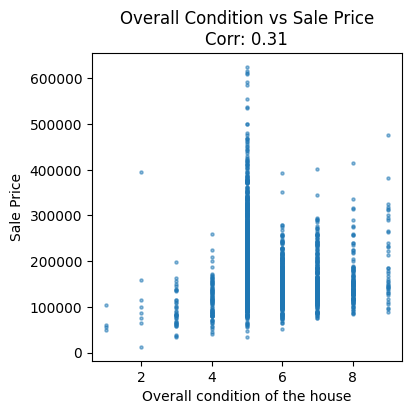

In [ ]:
corr_overallcondvssaleprice = df['OverallCond'].corr(df['SalePrice'])
plt.figure(figsize=(4,4))
plt.scatter(df['OverallCond'], df['SalePrice'], alpha=0.5, s=5)
plt.title(f"{'Overall Condition'} vs Sale Price\nCorr: {corr_value:.2f}")
plt.ylabel('Sale Price')
plt.xlabel('Overall condition of the house')
plt.show()

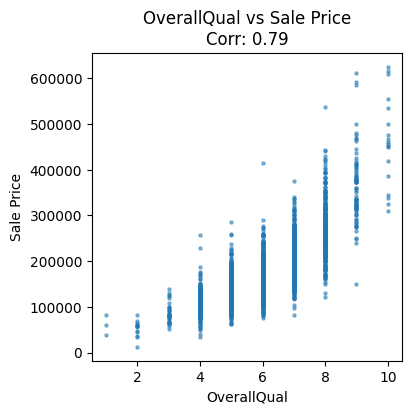

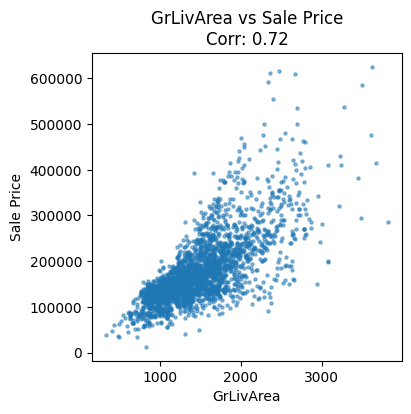

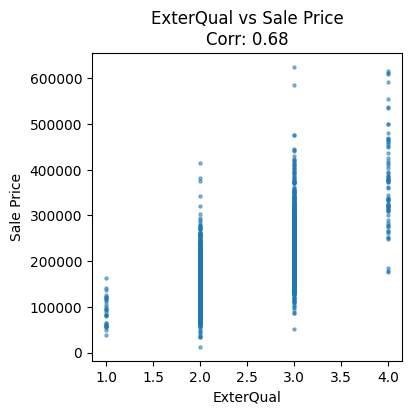

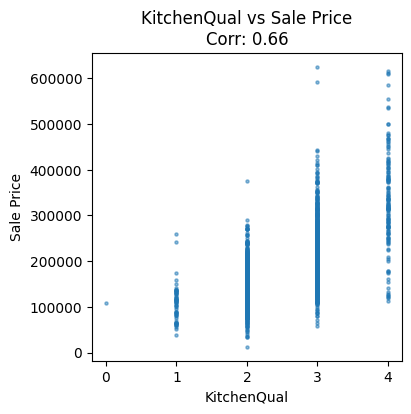

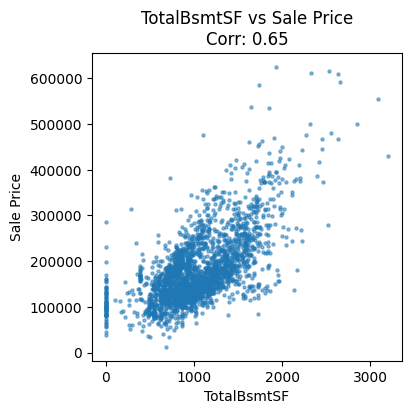

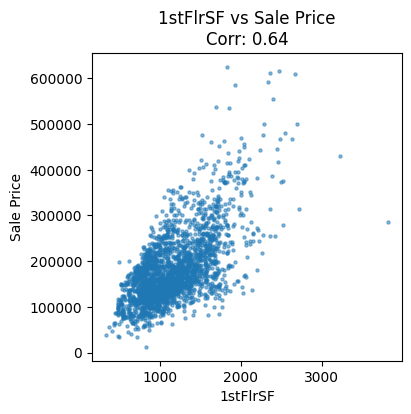

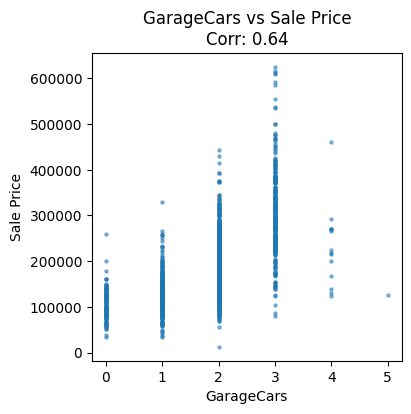

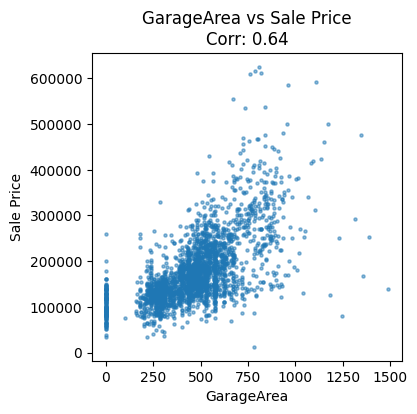

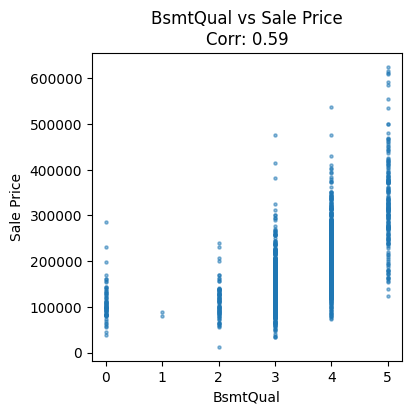

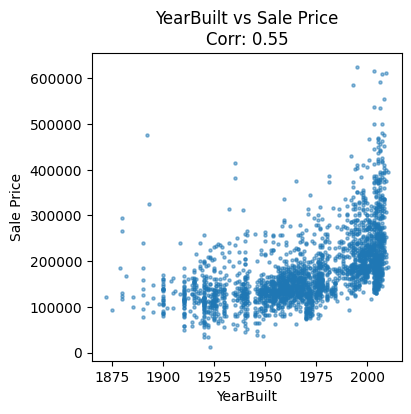

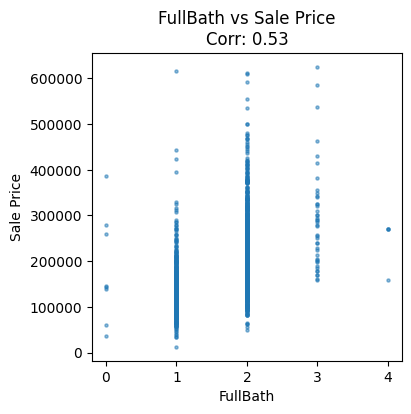

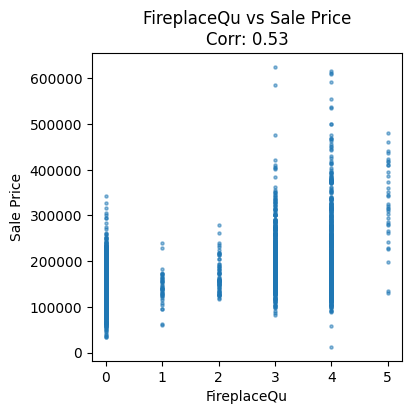

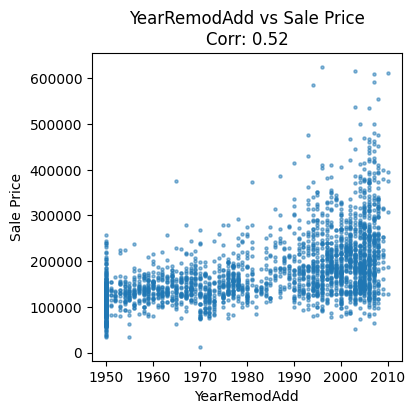

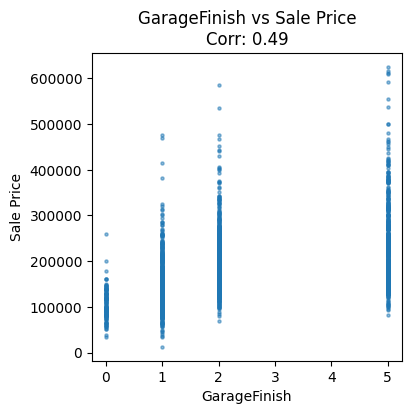

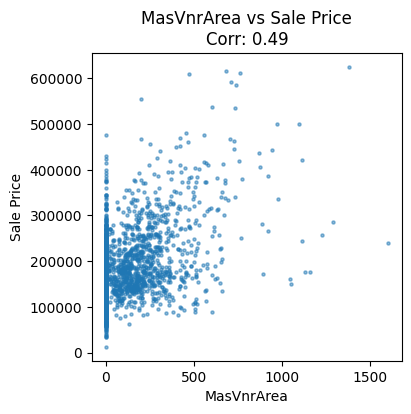

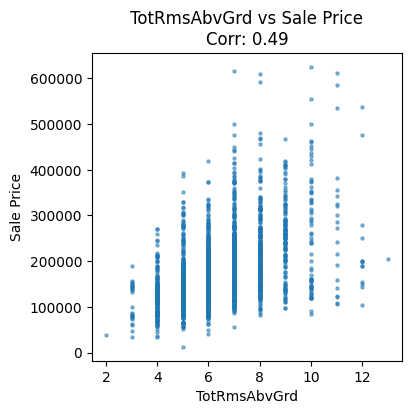

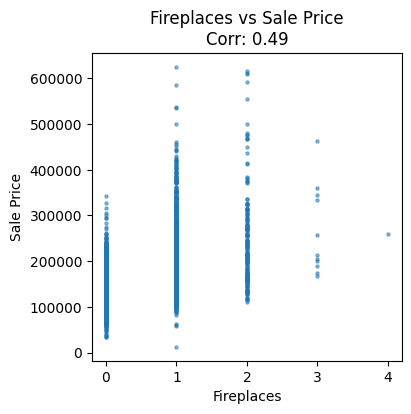

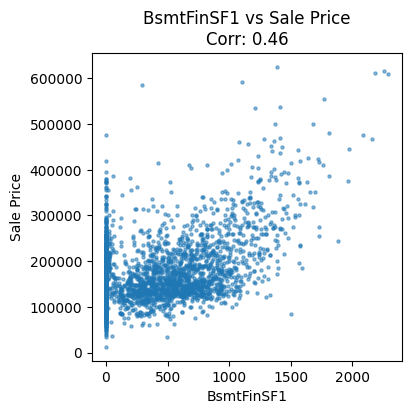

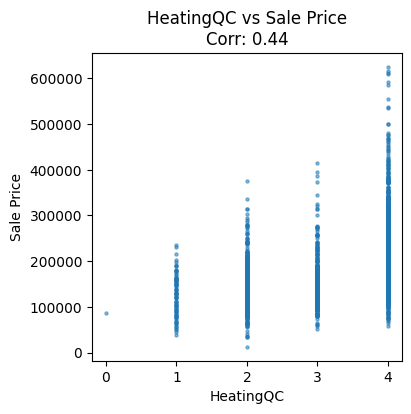

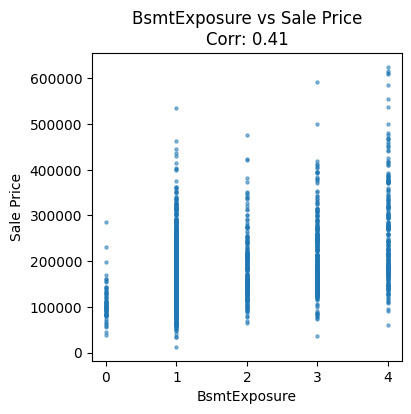

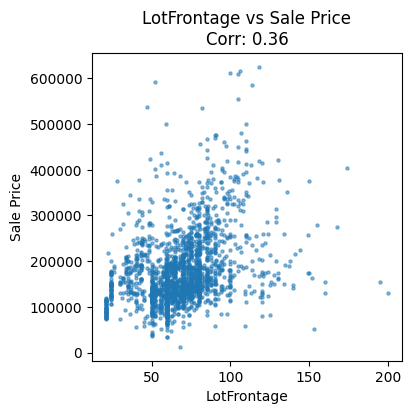

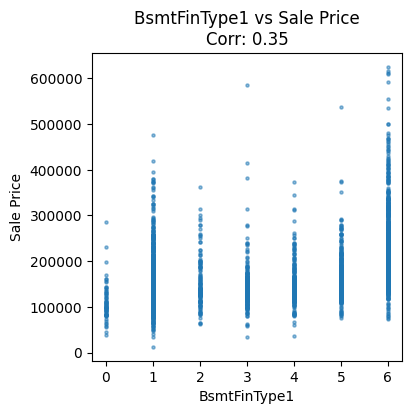

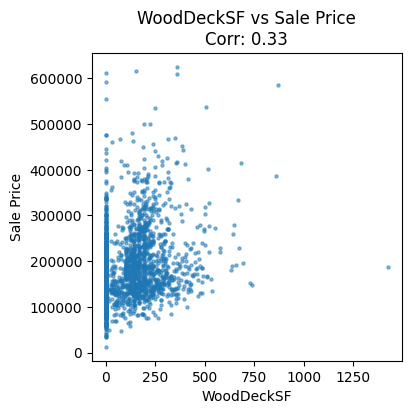

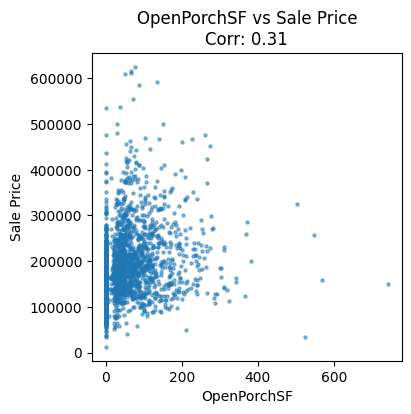

In [ ]:
# STRONGEST POSITIVE CORRELATIONS

# select non-object columns
numeric_df = df.select_dtypes(exclude='object')

# correlation matrix (non-object only)
corr_matrix = numeric_df.corr()

# correlation matrices with SalePrice
corr_matrix_pos = corr_matrix['SalePrice'].drop('SalePrice').sort_values(ascending=False)
pos_corr_vars = corr_matrix_pos[corr_matrix_pos >= 0.3].index

for col in pos_corr_vars:
    if col == 'LotFrontage':
            df_plot = df[df['LotFrontage']<=210]
            corr_value = df_plot['LotFrontage'].corr(df_plot['SalePrice'])
    else: 
          df_plot = df
          corr_value = corr_matrix_pos[col]

    plt.figure(figsize=(4,4))
    plt.scatter(df_plot[col], df_plot['SalePrice'], alpha=0.5, s=5)
    plt.title(f"{col} vs Sale Price\nCorr: {corr_value:.2f}")
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.show()

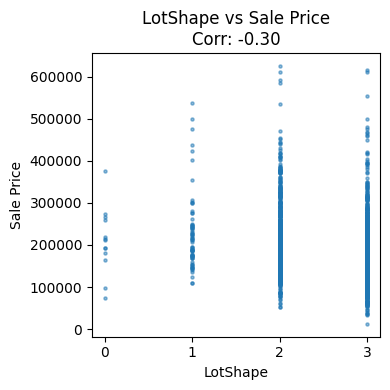

In [ ]:
# STRONGEST NEGATIVE CORRELATIONS

corr_matrix_neg = corr_matrix['SalePrice'].drop('SalePrice').sort_values()
neg_corr_vars = corr_matrix_neg[corr_matrix_neg <= -0.2].index

# Step 4: Generate scatter plots
for col in neg_corr_vars:
    df_plot = df[[col, 'SalePrice']].dropna()
    corr_value = df_plot[col].corr(df_plot['SalePrice'])

    plt.figure(figsize=(4, 4))
    plt.scatter(df_plot[col], df_plot['SalePrice'], s=5, alpha=0.5)
    plt.title(f"{col} vs Sale Price\nCorr: {corr_value:.2f}")
    plt.xlabel(col)
    plt.ylabel("Sale Price")
    plt.tight_layout()
    plt.show()

##### 3.2.2 Boxplots

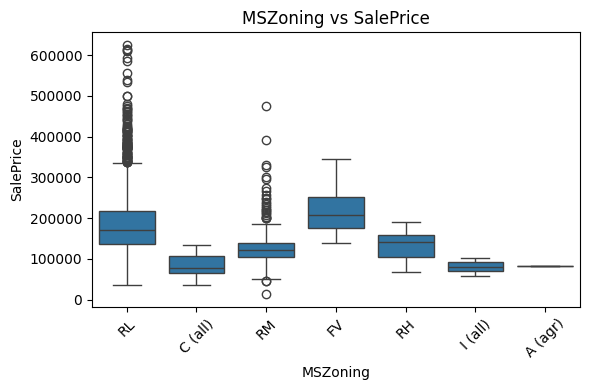

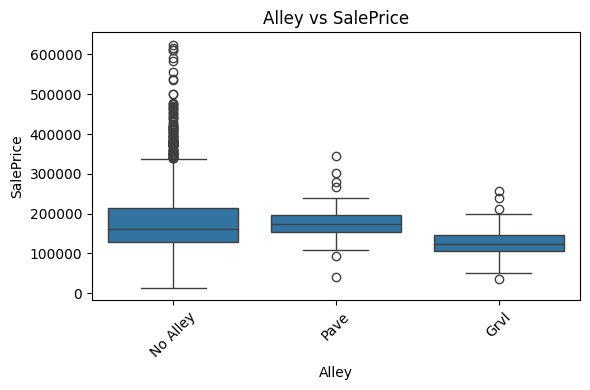

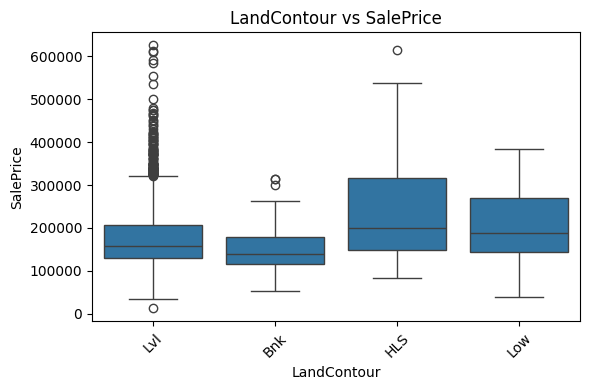

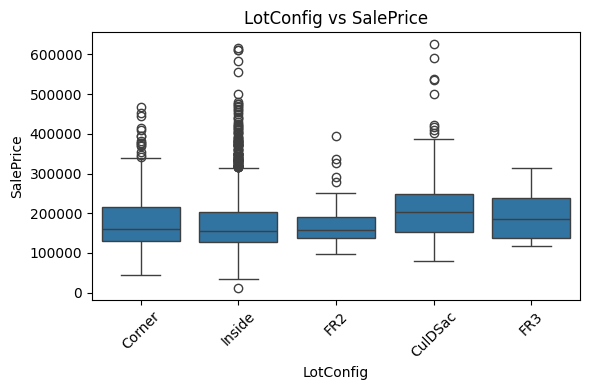

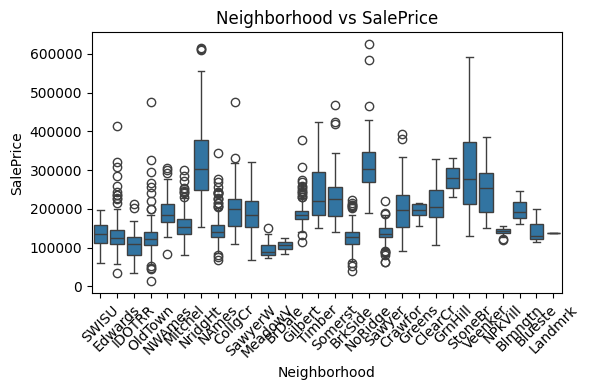

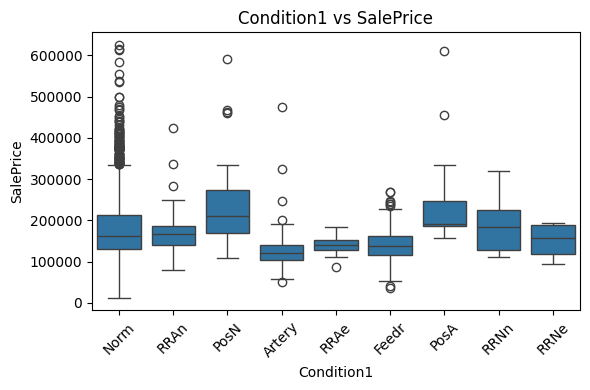

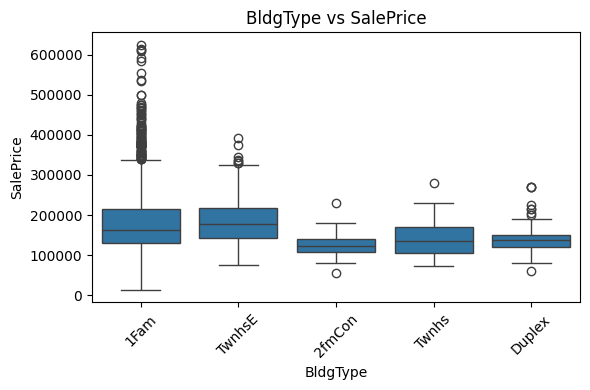

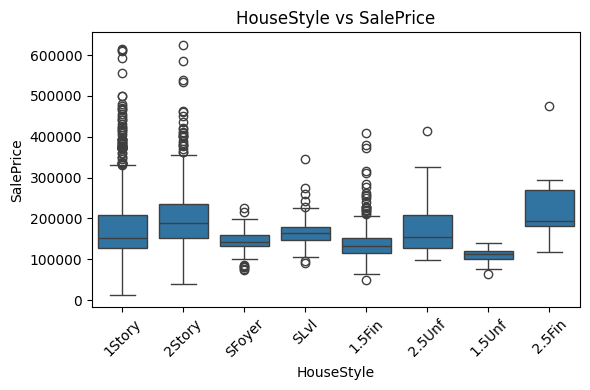

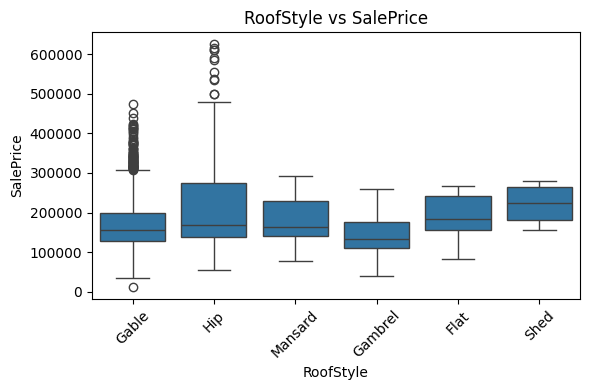

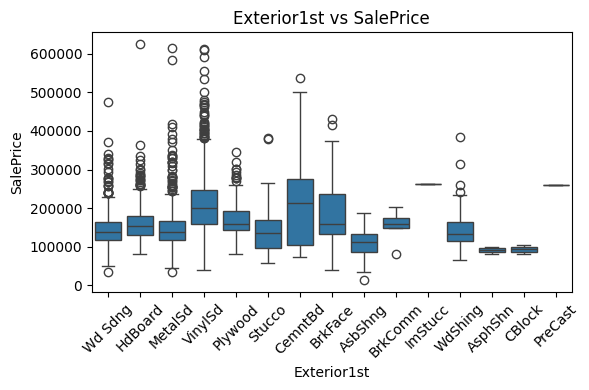

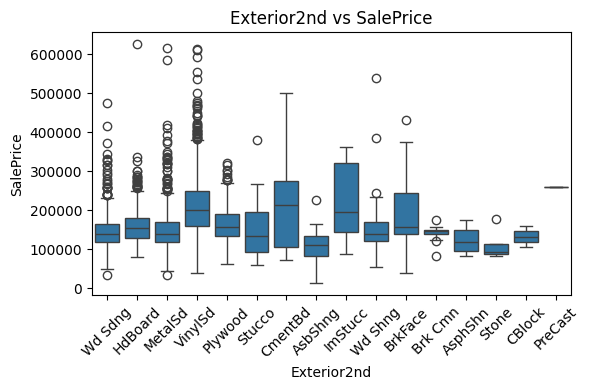

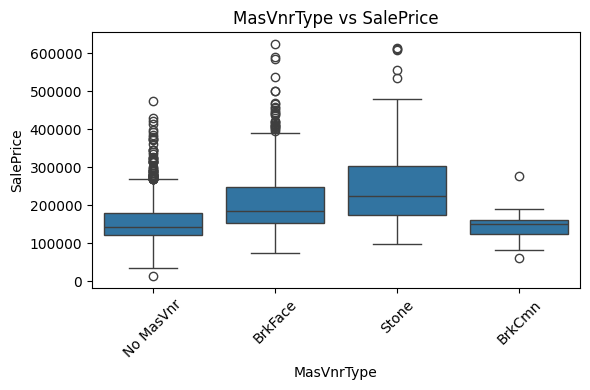

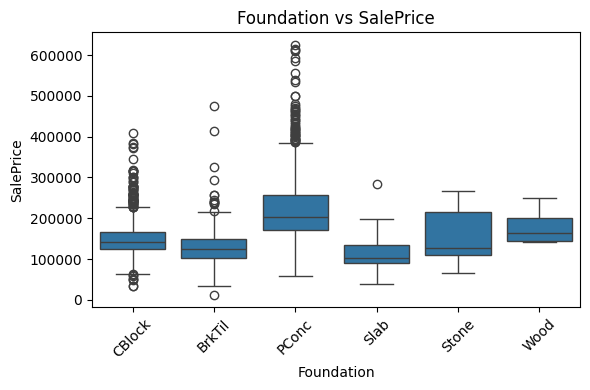

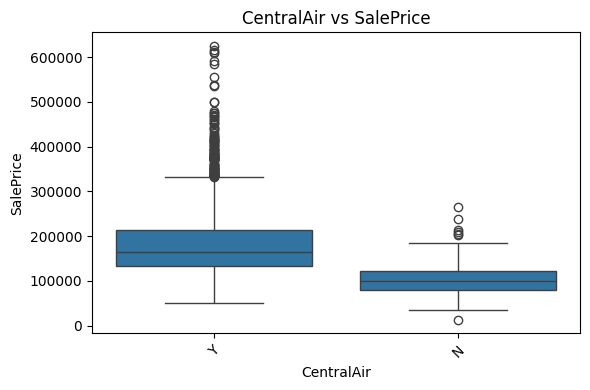

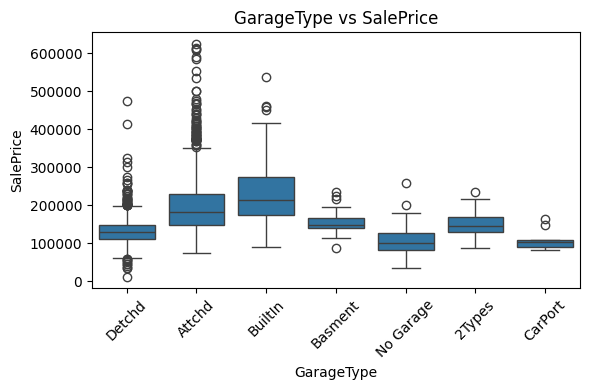

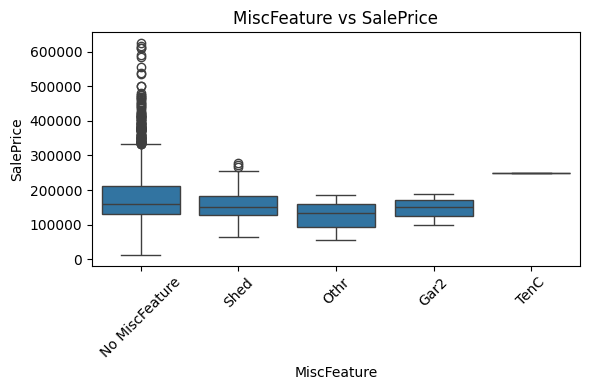

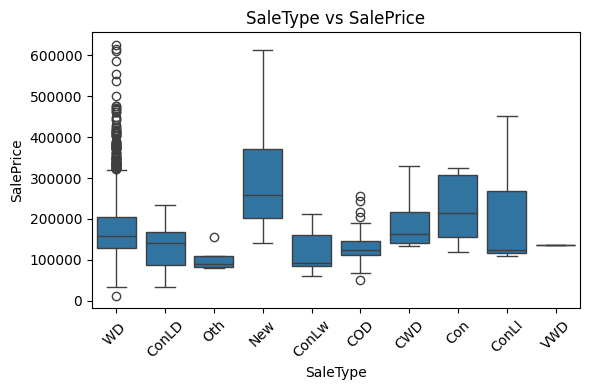

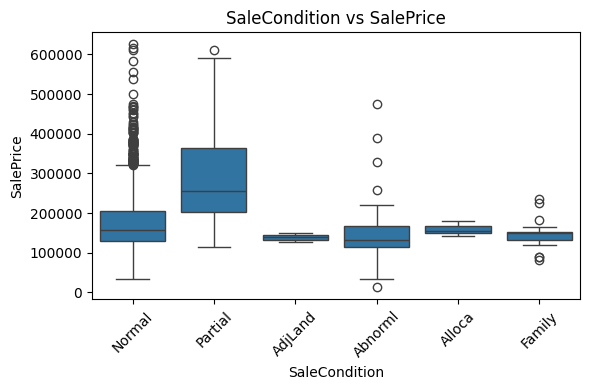

In [ ]:
# Boxplots for nominal categorical columns
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    if df[col].nunique() > 1:
        subset = df[['SalePrice', col]].dropna()
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=col, y='SalePrice', data=subset)
        plt.xticks(rotation=45)
        plt.title(f'{col} vs SalePrice')
        plt.tight_layout()
        plt.show()

##### 3.2.3 Heatmaps

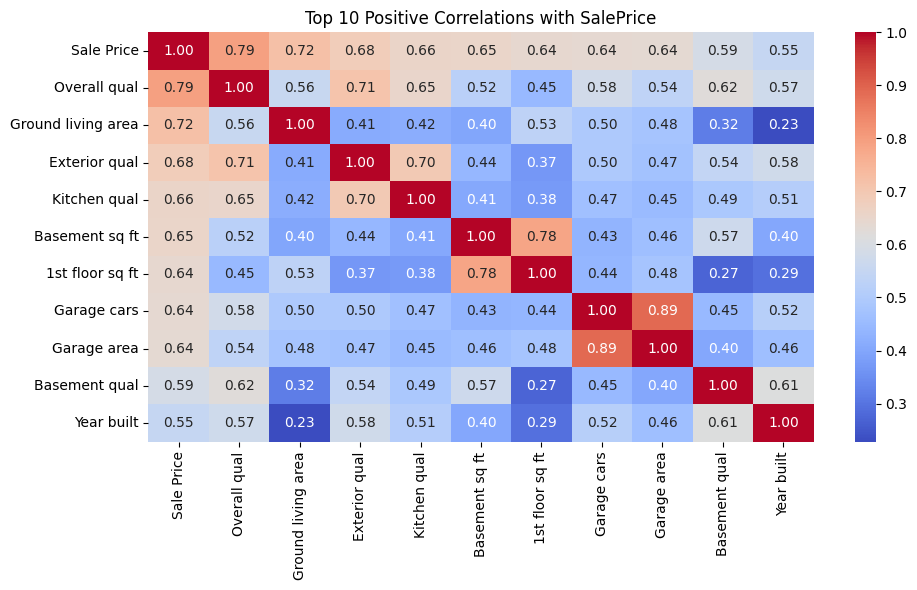

In [ ]:
numeric_df = df.select_dtypes(exclude='object')

# Step 2: Get the correlation matrix
corr_matrix = numeric_df.corr()

# # Get the top 25 features most positively correlated with SalePrice (excluding SalePrice itself)
top_15_corr = corr_matrix['SalePrice'].drop('SalePrice').sort_values(ascending=False).head(10)
top_15_corr

# Subset the dataframe to just these top correlated features
top_pos_features = ['SalePrice']+ top_15_corr.index.tolist()
top_pos_features
top_pos_corr_matrix = df[top_pos_features].corr()
top_pos_corr_matrix

# Define a dictionary for renaming variables
label_map = {
    'SalePrice': 'Sale Price',
    'OverallQual': 'Overall qual',
    'GrLivArea': 'Ground living area',
    'ExterQual': 'Exterior qual',
    'KitchenQual': 'Kitchen qual',
    'BsmtQual': 'Basement qual',
    'TotalBsmtSF': 'Basement sq ft',
    '1stFlrSF': '1st floor sq ft',
    'GarageCars': 'Garage cars',
    'GarageArea': 'Garage area',
    'YearBuilt': 'Year built',
    'FullBath': 'Full baths',
    'FireplaceQu': 'Fireplace qual',
    'GarageYrBlt': 'Garage yr blt',
    'YearRemodAdd': 'Year remodeled',
    'GarageFinish': 'Garage finish'
}

# Rename rows and columns of the correlation matrix
top_pos_corr_matrix_renamed = top_pos_corr_matrix.rename(index=label_map, columns=label_map)

# Plot heatmap with new labels
plt.figure(figsize=(10, 6))
sns.heatmap(top_pos_corr_matrix_renamed, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Top 10 Positive Correlations with SalePrice")
plt.tight_layout()
plt.show()

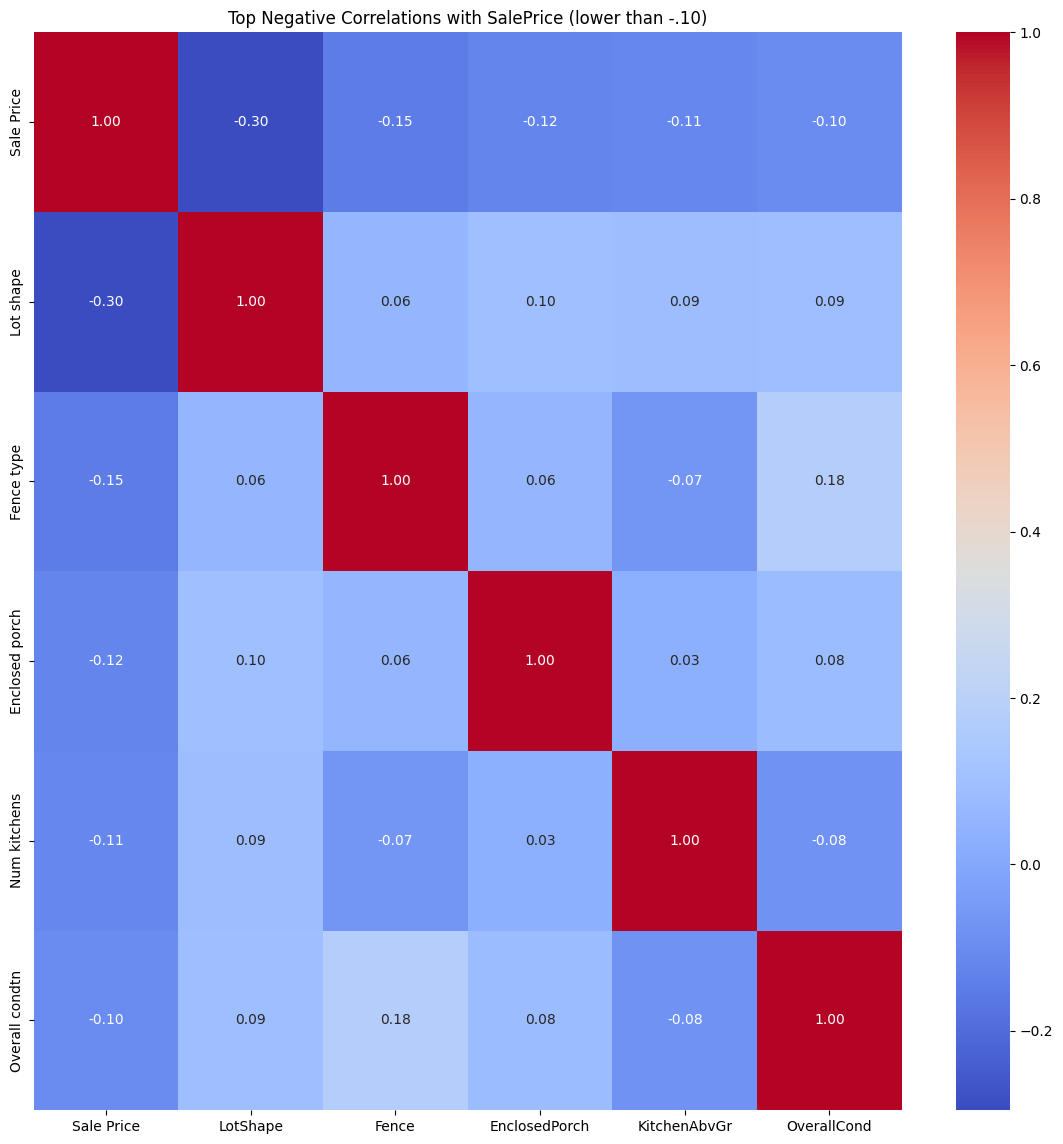

In [ ]:
numeric_df = df.select_dtypes(exclude='object')

# Compute correlation matrix from numeric variables
corr_matrix = numeric_df.corr()

bottom_15_corr = corr_matrix['SalePrice'][corr_matrix['SalePrice']<-0.1].sort_values(ascending=True)
bottom_15_corr

# Subset the dataframe to just these top correlated features
top_neg_features = ['SalePrice']+ bottom_15_corr.index.tolist()
top_neg_features
top_neg_corr_matrix = numeric_df[top_neg_features].corr()
top_neg_corr_matrix

# Define a dictionary for renaming variables
label_map_neg = {
    'SalePrice': 'Sale Price',
    'LotShape': 'Lot shape',
    'CentralAir': 'Central air cond',
    'Electrical': 'Electrical syst',
    'MSZoning': 'Zoning class',
    'BldgType': 'Building type',
    'Fence': 'Fence type',
    'HouseStyle': 'House style',
    'EnclosedPorch': 'Enclosed porch',
    'KitchenAbvGr': 'Num kitchens',
    'Condition1': 'Feature proximity',
    'OverallCond': 'Overall condtn',
    'MSSubClass': 'Dwelling type',
    'Heating': 'Heating',
    'LandSlope': 'Land slope',
    'BsmtHalfBath': 'Basement half baths'
}

# Rename rows and columns of the correlation matrix
top_neg_corr_matrix_renamed = top_neg_corr_matrix.rename(index=label_map_neg, columns=label_map)

# Plot heatmap
# set the figure size
plt.figure(figsize=(14, 14))
# tell the type of graph that it's going to be
sns.heatmap(top_neg_corr_matrix_renamed, annot=True, fmt=".2f", annot_kws={'size': 10}, cmap='coolwarm')
plt.title('Top Negative Correlations with SalePrice (lower than -.10)')
plt.show()
           
# = is for default values
#  : is for type hints. Used to describe the type of a variable or a parameter.

In [ ]:
# saving df as pickle file
df.to_pickle('df.pkl')